In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scikits.odes.ode import ode
import time
import seaborn as sns

In [2]:
#Import local functions
def activation(x, k, theta, n):
    return (k*(x/theta)**n)/(1+(x/theta)**n)

def repression(x, k, theta, n):
    return k/(1+(x/theta)**n)

def nonlinearity(x, kc, km):
    return (kc*x)/(km+x)

def loss_biological(j1, j2, alpha1, alpha2):
    """Computes scalarized loss including genetic constraint and product production"""
    loss = alpha1*j1 + alpha2*j2
    return j1, j2, loss

In [3]:
#Run for DA
def dual_control(t, y, ydot):
        kc=12.; km=10.; lam=1.93E-4; Vin=1.; e0=0.0467
        ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - lam*y[1]
        ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
        ydot[2] = k1 - lam*y[2]
        ydot[3] = activation(y[1], k2, theta2, n2) - lam*y[3]
        ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
        ydot[5] = activation(y[1], k2, theta2, n2)

In [4]:
#Establish hyperparameters
alpha1 = 1E-5
alpha2 = 1E-2

int_time = 5E4
t = np.linspace(0, int_time, 100) 
y0 = np.array([2290., 0., 0., 0., 0., 0.]) 

#Constants
Vin = 1
e0 = 0.0467 
lam = 1.93E-4 
#Assume equal kinetics for all three enzymes
kc = 12 
km = 10


In [10]:
sample = pd.read_csv('../initialization_experiments/Da_bestloss_samples.csv')
sample

,Unnamed: 0,Circuit,Computational Time,Best Loss,Loss AUC,k1,k2,n1,n2,theta1,theta2,tsne1,tsne2,pc1,pc2
0,0,Downstream Activation,10.534406,0.077144,17.818796,0.000046,0.000658,1.321756,3.529644,8.807857,5.585732,17.229795,3.190752,1.313485,4.626335
1,0,Downstream Activation,3.806562,0.079616,1.643808,0.000043,0.000604,3.460495,3.924052,4.926406,4.547179,17.198536,1.948327,1.779218,3.727208
2,0,Downstream Activation,9.578094,0.063574,11.873899,0.000050,0.000023,3.776663,2.333087,7.964707,1.003586,6.674195,-8.584927,-1.336172,-0.502414
3,0,Downstream Activation,5.794737,0.069505,3.001968,0.000040,0.000264,2.050531,3.384181,6.614925,6.949693,3.011721,10.885799,0.024446,2.237246
4,0,Downstream Activation,7.701240,0.061845,10.616226,0.000045,0.000034,2.530057,1.393886,3.221331,4.709652,-0.706152,0.274939,-0.943890,-0.916360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,Downstream Activation,6.261676,0.061161,9.732938,0.000045,0.000033,1.075702,1.104921,4.134060,6.654626,4.965229,-0.280550,-1.068633,-0.554721
95,0,Downstream Activation,10.184152,0.063198,8.918252,0.000045,0.000029,1.914490,2.852624,1.573136,2.924363,-8.510501,4.157910,-0.331548,-0.286955
96,0,Downstream Activation,6.250197,0.062645,6.205843,0.000050,0.000034,3.089252,2.190275,0.806749,5.055964,-5.383926,0.382270,-0.486949,-0.733749
97,0,Downstream Activation,9.621868,0.063381,25.599844,0.000052,0.000023,3.073113,1.464435,7.711169,0.311392,5.251700,-8.445399,-1.381050,-1.017622


<AxesSubplot:>

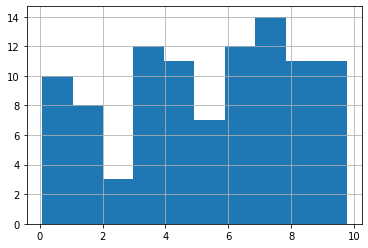

In [17]:
sample.theta2.hist()

In [ ]:
ns = [1, 2, 3, 4]
thetas = [0.01, 0.05, 0.1, 0.5, 1, 2.5, 5, 7.5, 10, 100]
ks = [1E-7, 5E-6, 1E-6, 5E-5, 1E-5, 5E-4, 1E-4, 1E-3, 1E-3]